In [27]:
import tensorflow as tf
from tensorflow import keras

# Load MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_A = x_train.reshape(-1, 784) / 255.0
x_test_A = x_test.reshape(-1, 784) / 255.0

# Define Model A
model_A = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_A.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callback to save the weights after each epoch
class SaveWeights(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        self.model.save_weights(f'weights_epoch_{epoch}.h5')

# Train the model with the SaveWeights callback
history_A = model_A.fit(x_train_A, y_train, batch_size=32, epochs=20, validation_data=(x_test_A, y_test))

# Load the weights from the last epoch
#model_A.load_weights('weights_epoch_19.h5')

# Evaluate the model on the test set
test_loss, test_acc = model_A.evaluate(x_test_A, y_test, verbose=0)
print('Test accuracy:', test_acc)


Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2345 - accuracy: 0.9309 - val_loss: 0.1163 - val_accuracy: 0.9645
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0991 - accuracy: 0.9695 - val_loss: 0.0926 - val_accuracy: 0.9711
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0683 - accuracy: 0.9787 - val_loss: 0.0735 - val_accuracy: 0.9763
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0511 - accuracy: 0.9841 - val_loss: 0.0786 - val_accuracy: 0.9750
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0416 - accuracy: 0.9863 - val_loss: 0.0877 - val_accuracy: 0.9740
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.0880 - val_accuracy: 0.9767
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0276 - accuracy: 0.9908 - val_loss: 0.0804 - val_accuracy:

In [28]:

# Load MNIST dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train_B = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_B = x_test.reshape(-1, 28, 28, 1) / 255.0

# Define Model B
model_B = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_B.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history_B = model_B.fit(x_train_B, y_train, batch_size=32, epochs=20, validation_data=(x_test_B, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model_B.evaluate(x_test_B, y_test, verbose=0)
print('Test accuracy:', test_acc)


Epoch 1/20
1875/1875 [==============================] - 64s 34ms/step - loss: 0.1363 - accuracy: 0.9582 - val_loss: 0.0402 - val_accuracy: 0.9855
Epoch 2/20
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0437 - accuracy: 0.9859 - val_loss: 0.0369 - val_accuracy: 0.9875
Epoch 3/20
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.0282 - val_accuracy: 0.9916
Epoch 4/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0211 - accuracy: 0.9933 - val_loss: 0.0272 - val_accuracy: 0.9907
Epoch 5/20
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0428 - val_accuracy: 0.9875
Epoch 6/20
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0138 - accuracy: 0.9955 - val_loss: 0.0286 - val_accuracy: 0.9924
Epoch 7/20
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0100 - accuracy: 0.9969 - val_loss: 0.0269 -

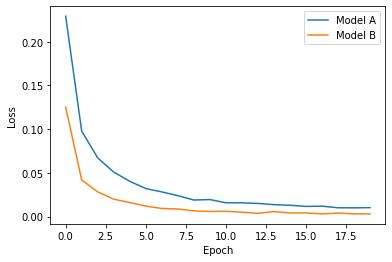

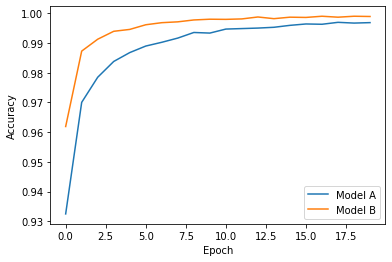

313/313 [==============================] - 3s 10ms/step


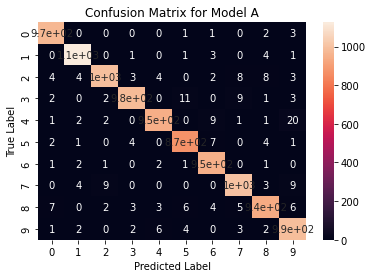

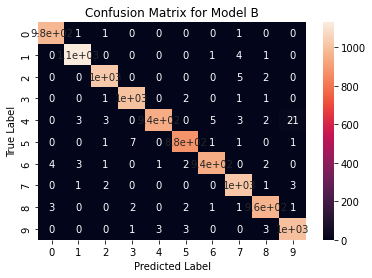

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Plot the loss function
plt.plot(history_A.history['loss'], label='Model A')
plt.plot(history_B.history['loss'], label='Model B')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history_A.history['accuracy'], label='Model A')
plt.plot(history_B.history['accuracy'], label='Model B')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the confusion matrix
y_pred_A = model_A.predict(x_test_A).argmax(axis=1)
y_pred_B = model_B.predict(x_test_B).argmax(axis=1)

confusion_matrix_A = np.zeros((10, 10))
for i in range(10000):
    confusion_matrix_A[y_test[i], y_pred_A[i]] += 1

confusion_matrix_B = np.zeros((10, 10))
for i in range(10000):
    confusion_matrix_B[y_test[i], y_pred_B[i]] += 1

sns.heatmap(confusion_matrix_A, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Model A')
plt.show()

sns.heatmap(confusion_matrix_B, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Model B')
plt.show()


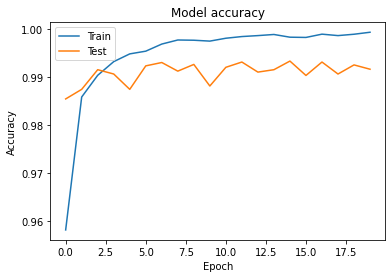

In [29]:
# Plot training and validation accuracy
plt.plot(history_B.history['accuracy'])
plt.plot(history_B.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

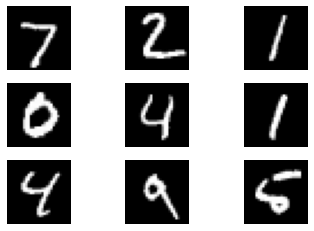

In [14]:
import torch 
import torchvision.datasets as datasets 
import torchvision.transforms as transforms 
import matplotlib.pyplot as plt

# Load MIST dataset
mnist_dataset = datasets.MNIST (root='mnist_data/', train=False, transform=transforms.ToTensor(), download=True)
# Select a batch of images from the dataset
images, labels = zip(*[x for x in mnist_dataset][:9])
images = torch.stack(images)
# Plot the images
fig, ax = plt.subplots(nrows=3, ncols=3)
for i in range(9):
    ax[i//3, i%3].imshow(images[i].squeeze(), cmap="gray")
    ax[i//3, i%3].axis('off')
plt.show()


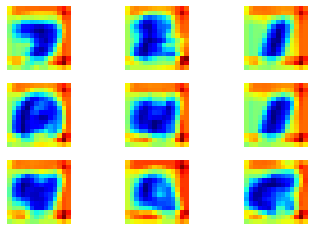

In [13]:
import torch 
import torch.nn as nn
import torchvision.models as models 
import torchvision.datasets as datasets 
import torchvision.transforms as transforms 
import matplotlib.pyplot as pit

# Load pre-trained resnet 18
model = models.resnet18(pretrained=True)
model.eval()

# Load MIST dataset
mnist_dataset = datasets.MNIST (root='mnist_data/', train= False, transform=transforms.ToTensor(), download=True)

# Select a batch of images from the dataset
images, labels = zip(*[x for x in mnist_dataset][ :9])
images = torch.stack(images).unsqueeze(0) # Add a batch dimension
images = images.squeeze(0) # Remove the batch dimension
images.reshape(-1, 1, 28, 28) # Reshape to (N, C, H, W)

# Add a layer to increase the number of channels in the input
channel_expansion = nn.Conv2d(1, 256, kernel_size=1)
images = channel_expansion (images)

# Pass the images through the network and get the activations of the selected layer
layer = model.layer4 # Choose a layer from the Reset architecture
activations = layer (images)

# Take the mean along the channel dimension to reduce the number of channels
activations = torch.mean(activations, dim=1)

# Visualize the activations as a grid of feature maps
fig, ax = pit.subplots(nrows=3, ncols=3)
for i in range(9):
  ax[i//3, i%3].imshow(activations[i].detach().numpy(), cmap="jet") 
  ax[i//3, i%3].axis('off')
pit.show()


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

# Load the ResNet-18 model and replace the final fully connected layer
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)

# Freeze all layers in the ResNet-50 model
for param in model.parameters():
    param.requires_grad = False

# Fine-tune the last few layers
for param in model.fc.parameters():
    param.requires_grad = True

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Convert the grayscale data to RGB data
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))
validation_size = len(train_dataset) - train_size
train_dataset, validation_dataset = torch.utils.data.random_split(train_dataset, [train_size, validation_size])

# Load the data into data loaders
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
validationloader = torch.utils.data.DataLoader(validation_dataset, batch_size=64, shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)


# Train the model
for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print('Epoch %d loss: %.3f' % (epoch + 1, running_loss / len(trainloader)))
    
    # Validate the model to ensure it does not overfit
    correct = 0
    total = 0
    with torch.no_grad():
        for data in validationloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the validation set: %d %%' % (100 * correct / total))

print('Finished Training')

# Test the model on the test set
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test set: %d %%' % (100 * correct / total))


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Epoch 1 loss: 1.245
Accuracy of the network on the validation set: 70 %
Epoch 2 loss: 0.925
Accuracy of the network on the validation set: 73 %
Epoch 3 loss: 0.852
Accuracy of the network on the validation set: 74 %
Epoch 4 loss: 0.801
Accuracy of the network on the validation set: 75 %
Epoch 5 loss: 0.763
Accuracy of the network on the validation set: 76 %
Epoch 6 loss: 0.738
Accuracy of the network on the validation set: 77 %
Epoch 7 loss: 0.714
Accuracy of the network on the validation set: 77 %
Epoch 8 loss: 0.699
Accuracy of the network on the validation set: 77 %
Epoch 9 loss: 0.689
Accuracy of the network on the validation set: 78 %
Epoch 10 loss: 0.675
Accuracy of the network on the validation set: 78 %
Epoch 11 loss: 0.667
Accuracy of the network on the validation set: 78 %
Epoch 12 loss: 0.656
Accuracy of the network on the validation set: 78 %
Epoch 13 loss: 0.646
Accuracy of the network on the validation set: 79 %
Epoch 14 loss: 0.639
Accuracy of the network on the validati

In [20]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.optim as optim

# Load the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

# Load the pre-trained model
model = torchvision.models.resnet18(pretrained=True)

# Convert the model to be used for a single channel input
model.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)

# Freeze the model parameters
for param in model.parameters():
    param.requires_grad = False

# Replace the final fully connected layer with a new layer that outputs 10 classes
model.fc = nn.Linear(512, 10)

# Move the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)

# Train the model
for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Convert the input image from 1 channel to 3 channels
        #inputs = torch.cat([inputs, inputs, inputs], dim=1)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1} Loss: {running_loss / len(trainloader):.4f}')


Epoch 1 Loss: 1.5000
Epoch 2 Loss: 1.3650
Epoch 3 Loss: 1.3437
Epoch 4 Loss: 1.3478
Epoch 5 Loss: 1.3382
Epoch 6 Loss: 1.3327
Epoch 7 Loss: 1.3291
Epoch 8 Loss: 1.3354
Epoch 9 Loss: 1.3321
Epoch 10 Loss: 1.3353
Epoch 11 Loss: 1.3321
Epoch 12 Loss: 1.3306
Epoch 13 Loss: 1.3270
Epoch 14 Loss: 1.3299
Epoch 15 Loss: 1.3348
Epoch 16 Loss: 1.3344
Epoch 17 Loss: 1.3215
Epoch 18 Loss: 1.3313
Epoch 19 Loss: 1.3288
Epoch 20 Loss: 1.3326


In [21]:
# Test the model
model.eval()

with torch.no_grad():
    correct = 0
    total = 0
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)

        # Convert the input image from 1 channel to 3 channels
        #images = torch.cat([images, images, images], dim=1)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the test images: {100 * correct / total:.2f}%')


Accuracy of the model on the test images: 58.33%
